# IR 1: Write a program for pre-processing of a text document such as stop word removal, stemming. 

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from  nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
sentence = "he quick brown fox jumps over the lazy dog While the dog sleeps the fox quickly runs to the nearby forest"

#Tokenization
nltk.download('punkt')
tokenized_words = word_tokenize(sentence)
tokenized_sentences = sent_tokenize(sentence)

print(tokenized_words)
print(tokenized_sentences)

['he', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', 'While', 'the', 'dog', 'sleeps', 'the', 'fox', 'quickly', 'runs', 'to', 'the', 'nearby', 'forest']
['he quick brown fox jumps over the lazy dog While the dog sleeps the fox quickly runs to the nearby forest']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91862\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#Stop words removal
nltk.download('stopwords')
stop_words = stopwords.words('english')

cleaned_token = []
for i in tokenized_words:
  if i not in stop_words:
    cleaned_token.append(i)

print("Unclean version ", tokenized_words)
print("Clean Version", cleaned_token)

Unclean version  ['he', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', 'While', 'the', 'dog', 'sleeps', 'the', 'fox', 'quickly', 'runs', 'to', 'the', 'nearby', 'forest']
Clean Version ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', 'While', 'dog', 'sleeps', 'fox', 'quickly', 'runs', 'nearby', 'forest']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91862\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#Stemming
snowball_stemmer = SnowballStemmer('english')

stemmed_words = []
for i in tokenized_words:
    stemmed = snowball_stemmer.stem(i)
    stemmed_words.append(stemmed)

print(stemmed_words)

['he', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazi', 'dog', 'while', 'the', 'dog', 'sleep', 'the', 'fox', 'quick', 'run', 'to', 'the', 'nearbi', 'forest']


In [5]:
#Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_words = []
for i in tokenized_words:
    lemmatized = wordnet_lemmatizer.lemmatize(i)
    lemmatized_words.append(lemmatized)

print(lemmatized_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91862\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91862\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['he', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazy', 'dog', 'While', 'the', 'dog', 'sleep', 'the', 'fox', 'quickly', 'run', 'to', 'the', 'nearby', 'forest']


In [6]:
#Pos Tagging
# dt - determinnant
# NN - noun
# In - prep / conjunc
nltk.download('averaged_perceptron_tagger')
pos_tag = nltk.pos_tag(tokenized_words)

print(pos_tag)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91862\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('he', 'PRP'), ('quick', 'MD'), ('brown', 'VB'), ('fox', 'JJ'), ('jumps', 'NNS'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('While', 'IN'), ('the', 'DT'), ('dog', 'NN'), ('sleeps', 'VBZ'), ('the', 'DT'), ('fox', 'JJ'), ('quickly', 'RB'), ('runs', 'VBZ'), ('to', 'TO'), ('the', 'DT'), ('nearby', 'JJ'), ('forest', 'NN')]


# IR 2: Implement a program for retrieval of documents using inverted files.


In [7]:
# Sample documents
documents = {
    "doc1": "This is a sample document about machine learning.",
    "doc2": "Machine learning is a subset of artificial intelligence.",
    "doc3": "Artificial intelligence and data science are evolving fields."
}

In [8]:
# Step 1: Create an inverted index
inverted_index = {}

In [9]:
# Populate the inverted index
for doc_id, text in documents.items():
    words = text.lower().split()
    for i in range(len(words)):
        # Single word
        w = words[i].strip(".,!?")
        inverted_index.setdefault(w, []).append(doc_id)

        # Two-word phrases
        if i + 1 < len(words):
            phrase = f"{w} {words[i + 1].strip('.,!?')}"
            inverted_index.setdefault(phrase, []).append(doc_id)

In [10]:
# Remove duplicate document entries
for term in inverted_index:
    inverted_index[term] = list(set(inverted_index[term]))

In [11]:
# Step 2: Search function
def search(term):
    term = term.lower()
    if term in inverted_index:
        results = inverted_index[term]
        print(f"Documents containing '{term}': {', '.join(results)}")
    else:
        print("No results found.")

In [12]:
# Display documents and allow user to search
print("Available documents:")
for doc_id, text in documents.items():
    print(f"{doc_id}: {text}")

Available documents:
doc1: This is a sample document about machine learning.
doc2: Machine learning is a subset of artificial intelligence.
doc3: Artificial intelligence and data science are evolving fields.


In [13]:
print("\nSearch for a term in the documents.")
search_term = input("Enter a term to search: ")
search(search_term)


Search for a term in the documents.
Enter a term to search: Machine
Documents containing 'machine': doc2, doc1


# IR 4: Implement Page Rank Algorithm using python. 

In [14]:
import numpy as np

def pagerank(graph, d=0.85, num_iterations=100):
    # Initialize the rank vector with equal probability for each node
    num_nodes = len(graph)
    rank = np.ones(num_nodes) / num_nodes  # Start with uniform distribution
    
    # Transition matrix: each row represents the probability of transitioning to each node
    transition_matrix = np.zeros((num_nodes, num_nodes))
    
    for i, edges in graph.items():
        if len(edges) == 0:
            continue  # Skip nodes with no outgoing edges
        
        probability = 1.0 / len(edges)
        for neighbor in edges:
            transition_matrix[neighbor, i] = probability

    # Apply the power iteration method to compute the PageRank
    for _ in range(num_iterations):
        rank = (1 - d) / num_nodes + d * np.dot(transition_matrix, rank)
    
    # Normalize the PageRank values so that they sum to 1
    rank_sum = np.sum(rank)
    normalized_rank = rank / rank_sum
    
    return normalized_rank

In [15]:
# Define the graph as an adjacency list
# Example: 
# Node 0 has outgoing edges to node 1 and node 2
# Node 1 has an outgoing edge to node 2
# Node 2 has an outgoing edge to node 0
graph = {
    0: [1, 2],
    1: [2],
    2: [0]
}

# Calculate the PageRank values
pagerank_values = pagerank(graph)

# Print the PageRank values (normalized)
print("PageRank values:", pagerank_values)

PageRank values: [0.38778971 0.21481063 0.39739966]


# IR 5: Implement Agglomerative hierarchical clustering algorithm using appropriate dataset

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

In [18]:
# Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [19]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_names])

In [20]:
# Perform Agglomerative Hierarchical Clustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X_scaled)

In [21]:
# Compute the linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')

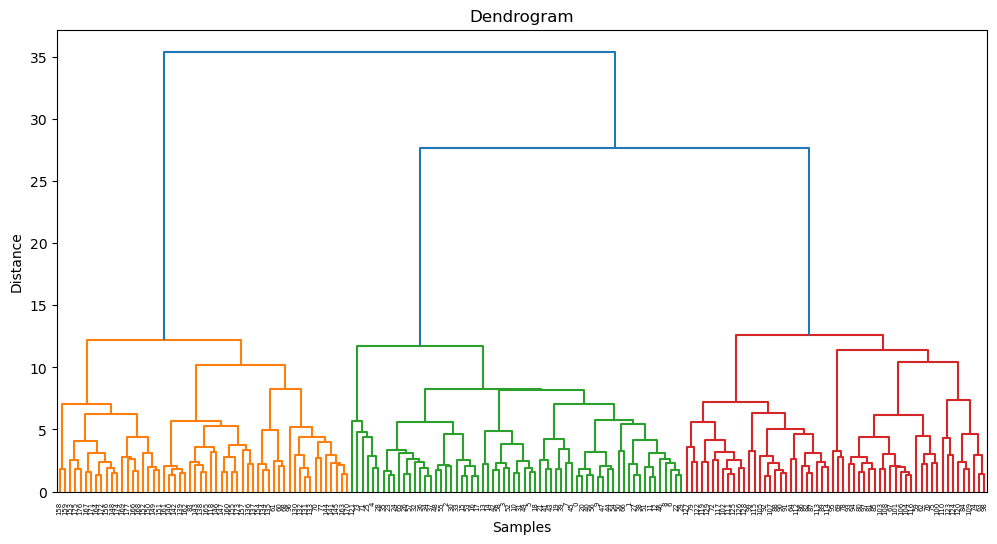

In [22]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

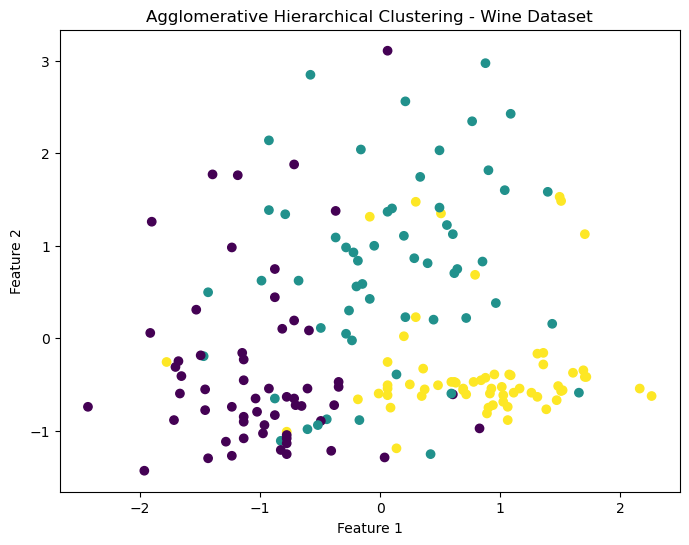

In [23]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('Agglomerative Hierarchical Clustering - Wine Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [24]:
# Print cluster labels and target values
print("Cluster Labels:")
print(labels)
print("\nTarget Values:")
print(df['target'])

Cluster Labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Target Values:
0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32
